In [1]:
# Data management
import pandas as pd
import pickle

# Data preprocessing and trasformation (ETL)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, FunctionTransformer, Binarizer, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml, load_iris, make_moons, make_classification


# Math and Stat modules
import numpy as np
from scipy.stats import sem, randint
from random import choice

# Supervised Learning
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, StratifiedKFold, RepeatedKFold, ShuffleSplit, StratifiedShuffleSplit, learning_curve, validation_curve, cross_validate
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.base import BaseEstimator
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

# Hyperparameter Optimization
#from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.utils.fixes import loguniform


# Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap

import seaborn as sns
from sklearn.tree import export_graphviz
%matplotlib inline

In [2]:
# carico i dati già preparati
X = pickle.load(open(r'C:/Users/lucam/Documents/master/feature_matrix.pickle','rb'))
y  = pickle.load(open(r'C:/Users/lucam/Documents/master/employee_label.pickle','rb'))
columns_name  = pickle.load(open(r'C:/Users/lucam/Documents/master/columns_name.pickle','rb'))

In [3]:
# train test split con dimensione test 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 225)

In [4]:
#definisco funzione per valutare le performance
def scores_val(y_train, y_train_pred):
    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred)
    recall = recall_score(y_train, y_train_pred)
    f1 = f1_score(y_train, y_train_pred)
    
    dict= {"accuracy": accuracy, 
    "precision": precision,
    "recall" : recall,
    "f1" : f1}
    
    return dict    

# SVM

## 1. Linear SVM

Training SVM per C = 0.1 0
Training per 0.1 finito
Training SVM per C = 1 1
Training per 1 finito
Training SVM per C = 10 2
Training per 10 finito
Training SVM per C = 100 3
Training per 100 finito
Training SVM per C = 500 4
Training per 500 finito


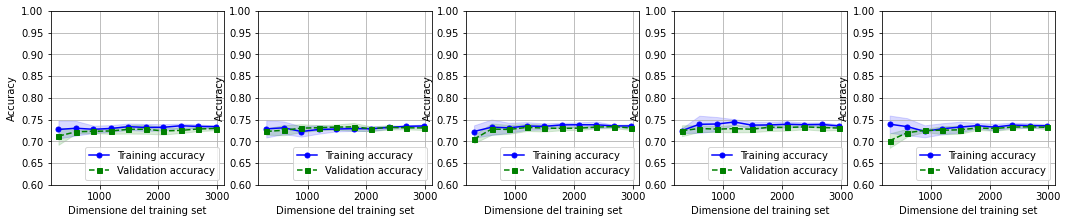

In [6]:
# Analizzo la learning curve per l'algoritmo linear SVM cambiando l'iperparametro C definire un insieme di valori di C tenendo in considerazione le precedenti osservazioni sul suo effetto 
Cs = [ 0.1, 1, 10, 100, 500]
fig = plt.figure(figsize=(18,3.2))
for i, c in enumerate(Cs):
    print('Training SVM per C =', c, i)
    svm_cls = LinearSVC(C = c, max_iter=50000)
    train_sizes, train_scores, test_scores = learning_curve(svm_cls, X = X_train,y= y_train, train_sizes=np.linspace(0.1,1,10), cv = 5, n_jobs=-1, shuffle = True)
    

    print('Training per {} finito'.format(c))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    ax = fig.add_subplot(150+(i+1))
    ax.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
    ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
    ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
    ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
    ax.grid()
    ax.set_ylim((0.6,1))
    ax.set_xlabel('Dimensione del training set')
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right')

In [18]:
svm_clf = LinearSVC(C=100, max_iter=500000)
svm_clf.fit(X_train, y_train)

LinearSVC(C=100, max_iter=500000)

In [19]:
y_train_pred= cross_val_predict(svm_clf, X_train, y_train, cv=5)

In [31]:
scores_val(y_train, y_train_pred)

{'accuracy': 0.7307898979043524,
 'precision': 0.6765083440308087,
 'recall': 0.41268598277212215,
 'f1': 0.5126459143968871}

- Modificando l'iperparametro non noto grande cambiamento nelle performance molto probabilmennte il mio dataset non è separabile linearmente per questo l'accuracy non sale pur modificando C (limite del SVM lineare)
- assenza di overfitting
- varianza bassa
- meglio del percettrone e delle regressione logistica
- recall bassa

## 2. SVM kernel rbf

In [7]:
# valutazione del modello SVM con Gaussian Radial Basis Function per tener conto della similarità
# si valutano 15 modelli combinando gli iperparametri c e gamma
gamma1, gamma2, gamma3 = 0.1, 0.2, 0.5
C1, C2, C3, C4, C5 = 1, 5, 10, 100, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma1, C3), (gamma1, C4), (gamma1, C5), (gamma2, C1), (gamma2, C2), (gamma2, C3),(gamma2, C4),(gamma2, C5), (gamma3, C1), (gamma3, C2),(gamma3, C3), (gamma3, C4), (gamma3, C5)

train_sizes, train_means, test_means, test_stds, train_stds = [],[],[],[],[]
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = SVC(kernel="rbf", gamma = gamma, C = C)
    train_size, train_scores, test_scores = learning_curve(rbf_kernel_svm_clf,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes=np.linspace(0.1,1.0,10),
                                                       cv=5,
                                                       n_jobs=-1)
    print('fatto {},{}'.format(gamma,C))
    train_means.append(np.mean(train_scores, axis=1))
    train_stds.append(np.std(train_scores, axis=1))
    test_means.append(np.mean(test_scores, axis=1))
    test_stds.append(np.std(test_scores, axis=1))
    train_sizes.append(train_size)

fatto 0.1,1
fatto 0.1,5
fatto 0.1,10
fatto 0.1,100
fatto 0.1,1000
fatto 0.2,1
fatto 0.2,5
fatto 0.2,10
fatto 0.2,100
fatto 0.2,1000
fatto 0.5,1
fatto 0.5,5
fatto 0.5,10
fatto 0.5,100
fatto 0.5,1000


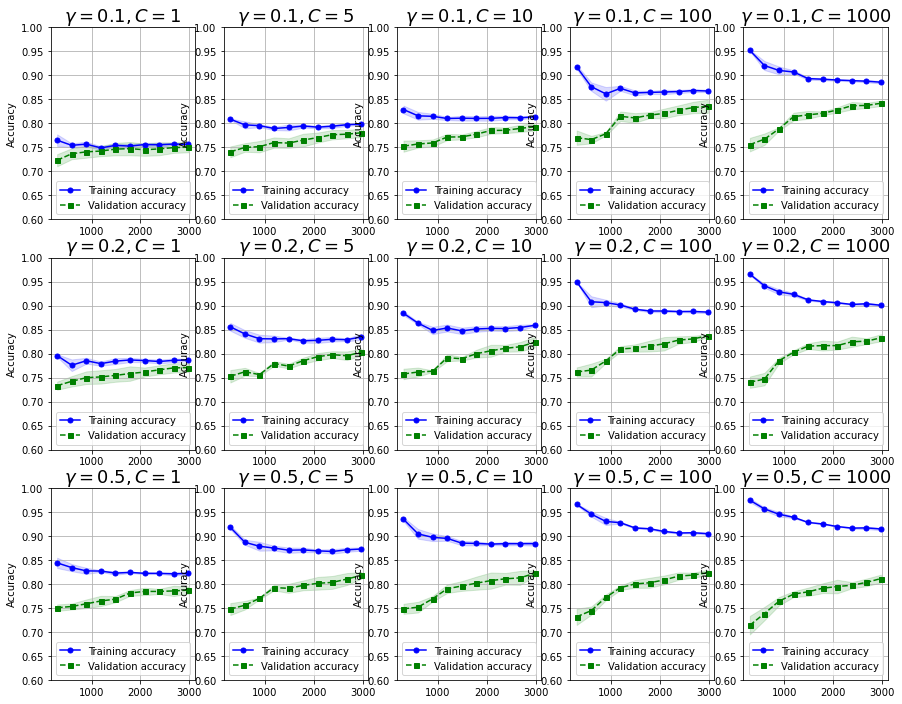

In [8]:
fig= plt.figure(figsize=(15, 12))
for i in range(15):
    ax = fig.add_subplot(3,5,1+i)
    ax.plot(train_sizes[i], train_means[i],
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
    ax.fill_between(train_sizes[i],
                 train_means[i] + train_stds[i],
                 train_means[i] - train_stds[i],
                 alpha=0.15, color='blue')
    ax.plot(train_sizes[i], test_means[i],
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
    ax.fill_between(train_sizes[i],
                 test_means[i] + test_stds[i],
                 test_means[i] - test_stds[i],
                 alpha=0.15, color='green')
    ax.grid()
    ax.set_ylim((0.6,1))
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right')
    ax.set_title(r"$\gamma={}, C={}$".format(*hyperparams[i]), fontsize=18)

- si può notare un miglioramento delle performance rispetto al linear SVM 
- aumentando troppo C e $\gamma$ si rischia di incorrere in overfitting
- il modello che sembra avere un compromesso migliore tra overfitting e performance è quello con C=100 e $\gamma$=0.1
- varianza sempre molto bassa

In [32]:
svm_rbf_clf= SVC(kernel="rbf", gamma = 0.1, C = 100)

In [33]:
y_train_pred= cross_val_predict(svm_rbf_clf, X_train, y_train, cv=5)

In [34]:
# valutiamo tutte le performance del modello che sembra migliore
scores_val(y_train, y_train_pred)

{'accuracy': 0.8363782912412682,
 'precision': 0.8422131147540983,
 'recall': 0.6436961628817541,
 'f1': 0.729693741677763}

- le performance sono tutte migliorate rispetto al linear SVM, in particolare è aumentata molto la recall e di conseguenza anche f1_score

## 3. Non linear SVM

In [9]:
# si implementa l'algoritmo SVM con kernel 2
train_sizes2, train_means2, test_means2, test_stds2, train_stds2 = [],[],[],[],[]
for gamma, C in hyperparams:
    kernel2_svm_clf = SVC(kernel="poly", degree=2, gamma = gamma, C = C)
    train_size, train_scores, test_scores = learning_curve(kernel2_svm_clf,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes=np.linspace(0.1,1.0,10),
                                                       cv=5,
                                                       n_jobs=-1)
    print('fatto {},{}'.format(gamma,C))
    train_means2.append(np.mean(train_scores, axis=1))
    train_stds2.append(np.std(train_scores, axis=1))
    test_means2.append(np.mean(test_scores, axis=1))
    test_stds2.append(np.std(test_scores, axis=1))
    train_sizes2.append(train_size)

fatto 0.1,1
fatto 0.1,5
fatto 0.1,10
fatto 0.1,100
fatto 0.1,1000
fatto 0.2,1
fatto 0.2,5
fatto 0.2,10
fatto 0.2,100
fatto 0.2,1000
fatto 0.5,1
fatto 0.5,5
fatto 0.5,10
fatto 0.5,100
fatto 0.5,1000


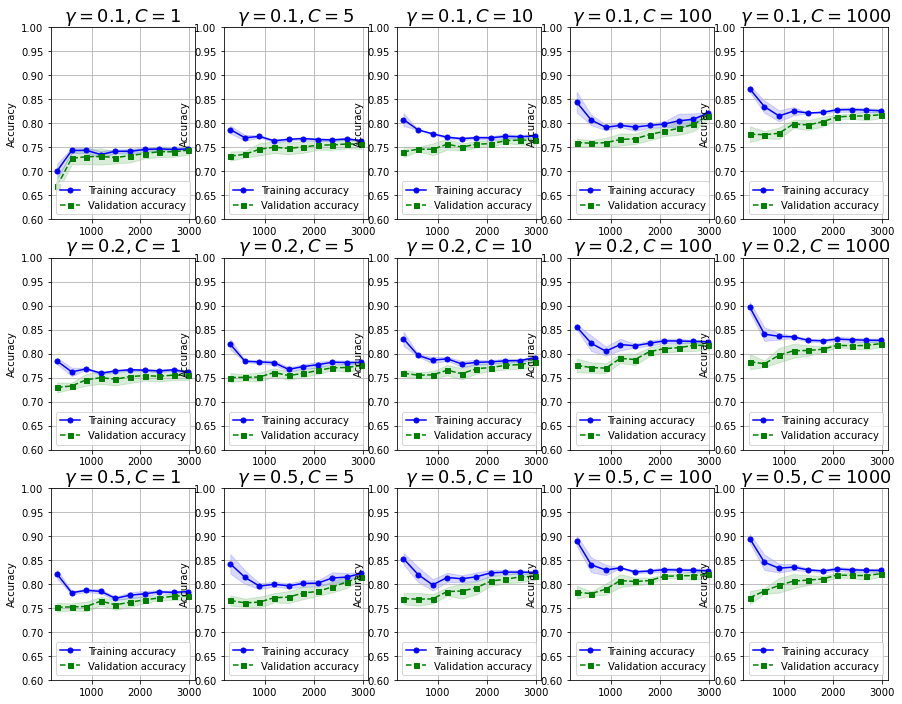

In [10]:
fig= plt.figure(figsize=(15, 12))
for i in range(15):
    ax = fig.add_subplot(3,5,1+i)
    ax.plot(train_sizes2[i], train_means2[i],
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
    ax.fill_between(train_sizes2[i],
                 train_means2[i] + train_stds2[i],
                 train_means2[i] - train_stds2[i],
                 alpha=0.15, color='blue')
    ax.plot(train_sizes2[i], test_means2[i],
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
    ax.fill_between(train_sizes2[i],
                 test_means2[i] + test_stds2[i],
                 test_means2[i] - test_stds2[i],
                 alpha=0.15, color='green')
    ax.grid()
    ax.set_ylim((0.6,1))
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right')
    ax.set_title(r"$\gamma={}, C={}$".format(*hyperparams[i]), fontsize=18)

- dalla learning curve si può notare la quai assenza di overfitting in tutti i modelli
- la varianza rimane sempre molto bassa
- le performance sembrano leggermente inferiori rispetto a rbf
- si può notare che $\gamma$ sia meno influente di C, infatti a parità di C cambiare $\gamma$ non influenza particolarmente le performance

In [36]:
svm_2_clf = SVC(kernel="poly", degree=2, gamma = 0.1, C = 1000 )

In [37]:
y_train_pred= cross_val_predict(svm_2_clf, X_train, y_train, cv=5)

In [38]:
# valutiamo tutte le performance del modello che sembra migliore
scores_val(y_train, y_train_pred)

{'accuracy': 0.8181085437936593,
 'precision': 0.8370786516853933,
 'recall': 0.5833985904463587,
 'f1': 0.687586525149977}

- le performance sono leggermente inferiori rispetto a rbf
- i costi computazionali per calcolare questi modelli sono molto elevati

## 4. Grid search

In [49]:
# si utilizza grid search per valutare le performance del modello migliore con kernel polinomiale
# vedendo che in grado 2 gamma non cambia molto cabio solo C e i gradi del kernel
param_grid = [
    {'kernel': ['poly'], 'degree': [1,2, 3, 4 ], 'C': [10, 100, 1000]}
]

grid_svm_clf = SVC()

grid_search = GridSearchCV(estimator=grid_svm_clf,
                           param_grid = param_grid,
                           cv = 5,
                           scoring = 'accuracy',
                           n_jobs = -1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [10, 100, 1000], 'degree': [1, 2, 3, 4],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [50]:
results_grid = grid_search.cv_results_

In [51]:
results_grid = pd.DataFrame(results_grid)[['mean_test_score','params']]
results_grid.sort_values(by='mean_test_score',ascending=False)

,mean_test_score,params
10,0.844711,"{'C': 1000, 'degree': 3, 'kernel': 'poly'}"
6,0.841487,"{'C': 100, 'degree': 3, 'kernel': 'poly'}"
11,0.832349,"{'C': 1000, 'degree': 4, 'kernel': 'poly'}"
7,0.832079,"{'C': 100, 'degree': 4, 'kernel': 'poly'}"
2,0.828588,"{'C': 10, 'degree': 3, 'kernel': 'poly'}"
3,0.828321,"{'C': 10, 'degree': 4, 'kernel': 'poly'}"
9,0.820259,"{'C': 1000, 'degree': 2, 'kernel': 'poly'}"
5,0.816766,"{'C': 100, 'degree': 2, 'kernel': 'poly'}"
1,0.781567,"{'C': 10, 'degree': 2, 'kernel': 'poly'}"
0,0.735087,"{'C': 10, 'degree': 1, 'kernel': 'poly'}"


- le performance con un kernel di grado 3 sembrano essere migliori rispetto a quelle con grado 2

Training SVM per C = 1 0
Training per 1 finito
Training SVM per C = 10 1
Training per 10 finito
Training SVM per C = 100 2
Training per 100 finito
Training SVM per C = 1000 3
Training per 1000 finito


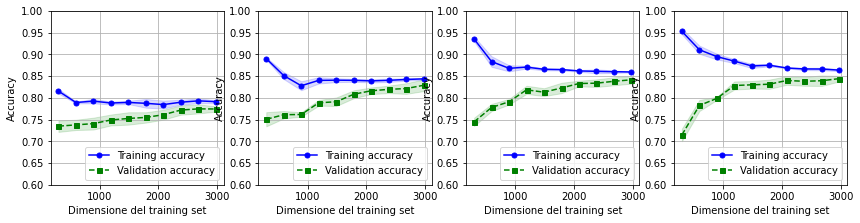

In [5]:
# si analizza anche il kernel di grado 3
C3 = [1, 10, 100, 1000]
fig = plt.figure(figsize=(18,3.2))
for i, c in enumerate(C3):
    print('Training SVM per C =', c, i)
    svm_3 = SVC(kernel="poly", degree=3, C = c )
    train_sizes, train_scores, test_scores = learning_curve(svm_3, X = X_train,y= y_train, train_sizes=np.linspace(0.1,1,10), cv = 5, n_jobs=-1)
    

    print('Training per {} finito'.format(c))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    ax = fig.add_subplot(150+(i+1))
    ax.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
    ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
    ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
    ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
    ax.grid()
    ax.set_ylim((0.6,1))
    ax.set_xlabel('Dimensione del training set')
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right')

In [5]:
# valutiamo tutte le performance del modello che sembra migliore
svm_3_clf = SVC(kernel="poly", degree=3, C = 1000 )
y_train_pred= cross_val_predict(svm_3_clf, X_train, y_train, cv=5)
scores_val(y_train, y_train_pred)

{'accuracy': 0.8447071466953251,
 'precision': 0.8667366211962224,
 'recall': 0.6468285043069695,
 'f1': 0.7408071748878923}

- performance molto buone, le migliori incontrate finora